In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [72]:
df=pd.read_csv('drawndata1.csv')
df.sample(5)

,x,y,z
19,155.172776,178.877970,a
244,-58.796124,-23.911532,a
242,52.704849,29.117192,a
101,1053.852067,285.002916,b
155,1554.846068,270.587079,b


In [73]:
X=df[['x','y']]
y=df['z']

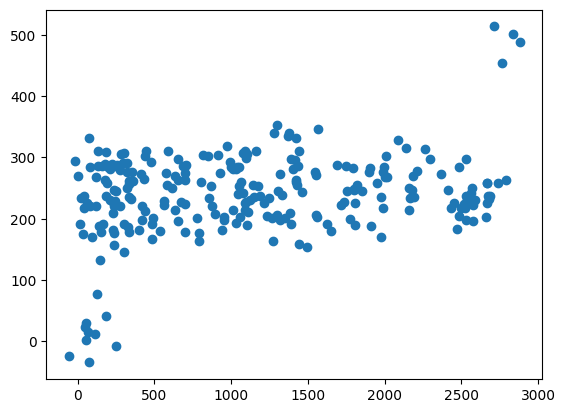

In [74]:
plt.scatter(X['x'],X['y'])

In [75]:
X=df[['x','y']]
y=df['z']== 'a'

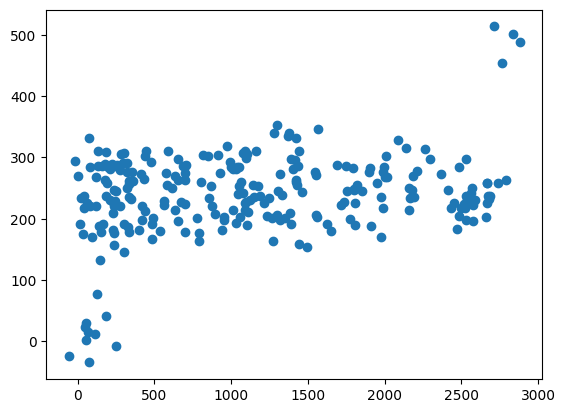

In [76]:
plt.scatter(X['x'],X['y'])

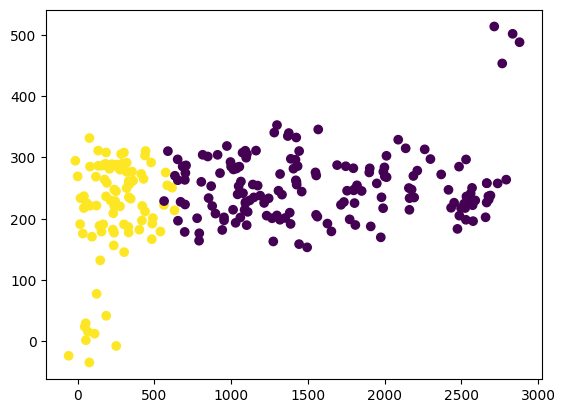

In [77]:
plt.scatter(X['x'],X['y'],c=y)

In [78]:
scaled_X=StandardScaler().fit_transform(X)



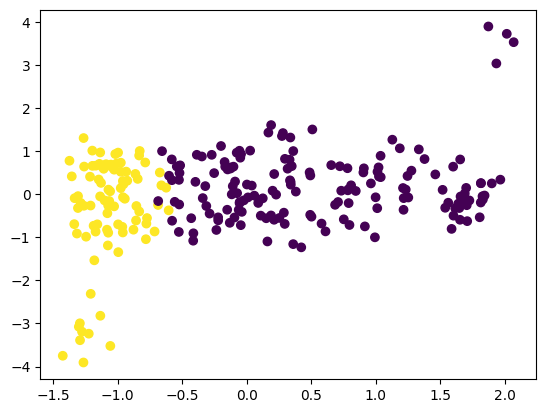

In [79]:
plt.scatter(scaled_X[:,0],scaled_X[:,1],c=y)

(array([[ 42.,  39.,  25.,  33.,  25.,  18.,  20.,  14.,  22.,  14.],
        [117., 135.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ -58.79612377,  235.09053019,  528.97718416,  822.86383812,
        1116.75049209, 1410.63714605, 1704.52380002, 1998.41045398,
        2292.29710794, 2586.18376191, 2880.07041587]),
 <a list of 2 BarContainer objects>)

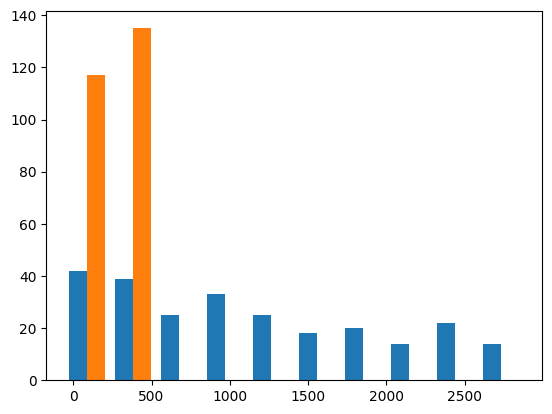

In [80]:
plt.hist(X)

(array([[ 0.,  0.,  0., 77., 63., 47., 33., 32.,  0.,  0.],
        [ 6.,  3.,  1., 22., 92., 90., 33.,  1.,  1.,  3.]]),
 array([-3.90650514, -3.12642651, -2.34634789, -1.56626927, -0.78619064,
        -0.00611202,  0.7739666 ,  1.55404523,  2.33412385,  3.11420247,
         3.89428109]),
 <a list of 2 BarContainer objects>)

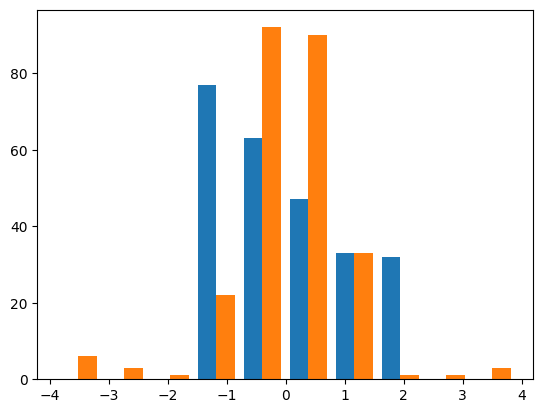

In [81]:
plt.hist(scaled_X)

In [82]:
scaled_X1=MinMaxScaler().fit_transform(X)

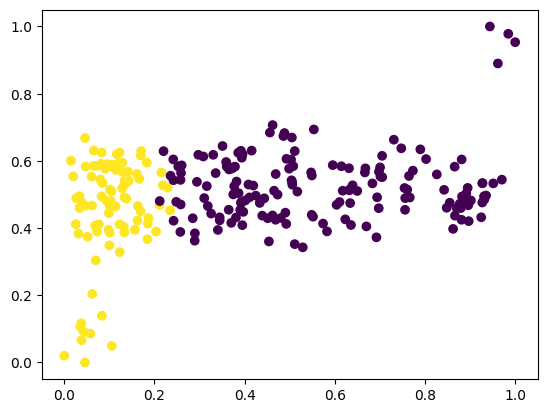

In [83]:
plt.scatter(scaled_X1[:,0],scaled_X1[:,1],c=y)

In [84]:
scatter_X2=QuantileTransformer().fit_transform(X)

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (252). n_quantiles is set to n_samples.
  warnings.warn(


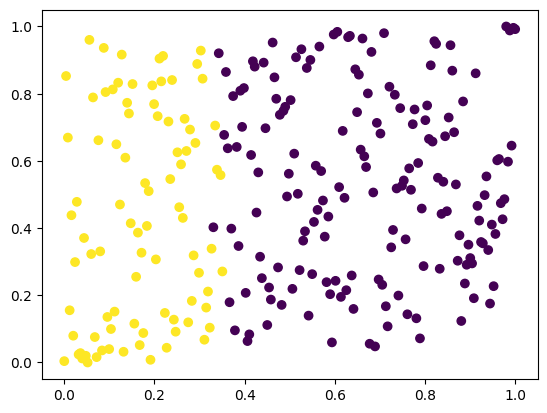

In [85]:
plt.scatter(scatter_X2[:,0],scatter_X2[:,1],c=y)

In [86]:
def plot_output(scaler):
    pipe = Pipeline([
         ("scale",scaler),
         ("model",KNeighborsClassifier())
    ])

    pred = pipe.fit(X,y).predict(X)

    plt.figure(figsize=(9,3))
    plt.subplot(131)
    plt.scatter(X['x'],X['y'],c=y)
    X_tfm=scaler.transform(X)
    plt.scatter(X_tfm[:,0],X_tfm[:,1],c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new=np.concatenate([
    np.random.uniform(0,X['x'].max(),(5000,1)),
    np.random.uniform(0,X['y'].max(),(5000,1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:,0],X_new[:,1],c=y_proba[:,1],alpha=0.7)
    plt.title("Predicted Data")

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


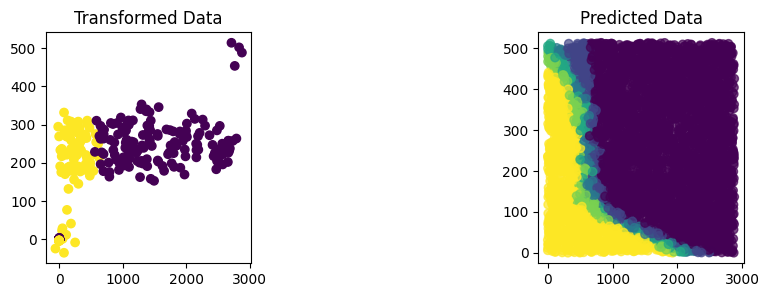

In [87]:
plot_output(scaler=StandardScaler())

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


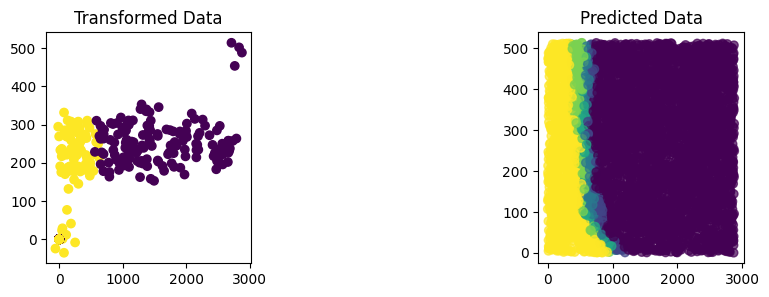

In [88]:
plot_output(scaler=MinMaxScaler())

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (252). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


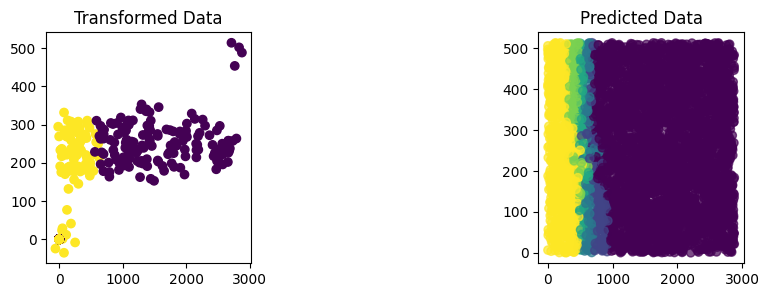

In [89]:
plot_output(scaler=QuantileTransformer())